In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('data_fix.csv')
df.head()

,Name,Instructor,Level,Star,Rate,Video,Reading,Quiz,Time,Link,Count_Instructor
0,Stanford University,"Nigam Shah, Mildred Cho, Laurence Baker",Beginner level,4.8,746,12,2,4,1.0,https://www.coursera.org/specializations/ai-he...,3
1,Stanford University,"Nigam Shah, Mildred Cho, Laurence Baker",Beginner level,4.8,746,12,1,3,1.0,https://www.coursera.org/specializations/ai-he...,3
2,Stanford University,"Nigam Shah, Mildred Cho, Laurence Baker",Beginner level,4.8,746,13,2,4,1.0,https://www.coursera.org/specializations/ai-he...,3
3,Stanford University,"Nigam Shah, Mildred Cho, Laurence Baker",Beginner level,4.8,746,15,1,3,1.0,https://www.coursera.org/specializations/ai-he...,3
4,Stanford University,"Nigam Shah, Mildred Cho, Laurence Baker",Beginner level,4.8,746,13,2,3,1.0,https://www.coursera.org/specializations/ai-he...,3


In [18]:
# Chuyển đổi dữ liệu chuỗi thành số
for column in ['Level', 'Video', 'Reading', 'Quiz']:
    df['Level'] = df['Level'].astype('category').cat.codes

# Khởi tạo centroid ban đầu
def initialize_centroids(df, k):
    return df.sample(n=k)

# Tính khoảng cách
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Gán dữ liệu cho các cụm
def assign_clusters(df, centroids):
    distances = np.zeros((df.shape[0], centroids.shape[0]))
    for idx, (i, centroid) in enumerate(centroids.iterrows()):
        d = np.apply_along_axis(euclidean_distance, 1, df.values, centroid.values)
        distances[:, idx] = d
    cluster_labels = np.argmin(distances, axis=1)
    return cluster_labels

# Cập nhật centroid
def update_centroids(df, cluster_labels, k):
    new_centroids = []
    for i in range(k):
        mean = df[cluster_labels == i].mean(axis=0)
        new_centroids.append(mean)
    return pd.DataFrame(new_centroids)

# Thuật toán KMeans
def kmeans(df, k, max_iters=100):
    centroids = initialize_centroids(df, k)
    for i in range(max_iters):
        cluster_labels = assign_clusters(df, centroids)
        new_centroids = update_centroids(df, cluster_labels, k)
        if np.array_equal(centroids.values, new_centroids.values):
            break
        centroids = new_centroids
    return cluster_labels

k = 3
selected_features = df[['Level', 'Video', 'Reading', 'Quiz']]
labels = kmeans(selected_features, k)
print(labels)


C:\Users\Duc\AppData\Local\Temp\ipykernel_13652\3015166317.py:11: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.sum((a - b) ** 2))


[0 0 0 ... 2 1 2]


In [19]:
for i in range(k):
    print('Cluster {}:'.format(i))
    print(df[labels == i]['Link'].values)
    print('')

Cluster 0:
['https://www.coursera.org/specializations/ai-healthcare'
 'https://www.coursera.org/specializations/ai-healthcare'
 'https://www.coursera.org/specializations/ai-healthcare' ...
 'https://www.coursera.org/specializations/liderazgo-efectivo'
 'https://www.coursera.org/specializations/gerencia-proyectos-complejos'
 'https://www.coursera.org/specializations/gerencia-proyectos-complejos']

Cluster 1:
['https://www.coursera.org/specializations/ai-healthcare'
 'https://www.coursera.org/specializations/ai-healthcare'
 'https://www.coursera.org/specializations/ai-healthcare' ...
 'https://www.coursera.org/specializations/desarrollo-nuevas-empresas'
 'https://www.coursera.org/specializations/desarrollo-nuevas-empresas'
 'https://www.coursera.org/specializations/desarrollo-nuevas-empresas']

Cluster 2:
['https://www.coursera.org/specializations/ai-healthcare'
 'https://www.coursera.org/specializations/food-sustainability-mindful-eating-healthy-cooking'
 'https://www.coursera.org/speci

C:\Users\Duc\AppData\Local\Temp\ipykernel_13652\3822558145.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.sum((a - b) ** 2))


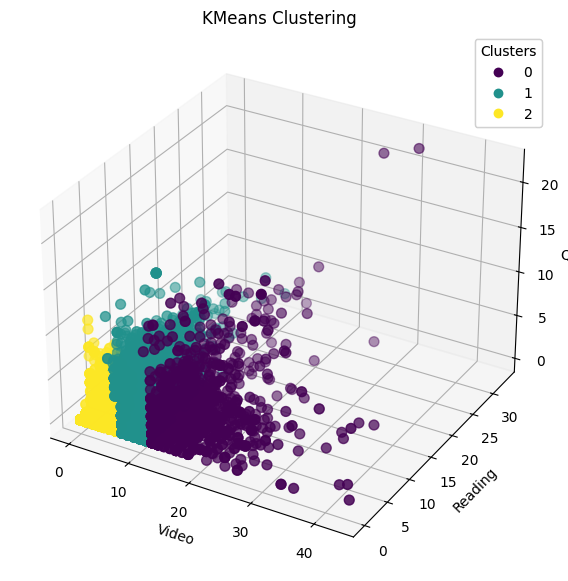

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Khởi tạo centroid ban đầu
def initialize_centroids(df, k):
    return df.sample(n=k)

# Tính khoảng cách
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Gán dữ liệu cho các cụm
def assign_clusters(df, centroids):
    distances = np.zeros((df.shape[0], centroids.shape[0]))
    for idx, (i, centroid) in enumerate(centroids.iterrows()):
        d = np.apply_along_axis(euclidean_distance, 1, df.values, centroid.values)
        distances[:, idx] = d
    cluster_labels = np.argmin(distances, axis=1)
    return cluster_labels

# Cập nhật centroid
def update_centroids(df, cluster_labels, k):
    new_centroids = []
    for i in range(k):
        mean = df[cluster_labels == i].mean(axis=0)
        new_centroids.append(mean)
    return pd.DataFrame(new_centroids)

# Thuật toán KMeans
def kmeans(df, k, max_iters=100):
    centroids = initialize_centroids(df, k)
    for i in range(max_iters):
        cluster_labels = assign_clusters(df, centroids)
        new_centroids = update_centroids(df, cluster_labels, k)
        if np.array_equal(centroids.values, new_centroids.values):
            break
        centroids = new_centroids
    return cluster_labels

# Chọn các thuộc tính cần thiết
selected_features = df[['Video', 'Reading', 'Quiz']]
labels = df['Level'].astype('category').cat.codes

# Chạy thuật toán KMeans
k = len(df['Level'].unique())  # Số cụm sẽ tương ứng với số lượng các mức độ khác nhau
cluster_labels = kmeans(selected_features, k)

# Vẽ biểu đồ 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Video'], df['Reading'], df['Quiz'], c=cluster_labels, cmap='viridis', s=50)

ax.set_title('KMeans Clustering')
ax.set_xlabel('Video')
ax.set_ylabel('Reading')
ax.set_zlabel('Quiz')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()


In [28]:
class TreeNode:
    def __init__(self):
        self.decision_attribute = None
        self.children = {}
        self.decision = None

def entropy(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    ent = -np.sum(probabilities * np.log2(probabilities))
    return ent

def information_gain(df, attribute, target):
    total_entropy = entropy(df[target])
    values, counts = np.unique(df[attribute], return_counts=True)
    weighted_entropy = np.sum([(counts[i]/np.sum(counts)) * entropy(df.where(df[attribute]==values[i]).dropna()[target]) for i in range(len(values))])
    return total_entropy - weighted_entropy

def ID3(df, target, attributes):
    root = TreeNode()
    
    # If all target values are the same, return single-node tree
    if len(np.unique(df[target])) == 1:
        root.decision = np.unique(df[target])[0]
        return root
    
    # If the list of attributes is empty, return single-node tree with most common value of target attribute
    if len(attributes) == 0:
        root.decision = df[target].value_counts().idxmax()
        return root
    
    # Choose the best attribute
    gains = [information_gain(df, attribute, target) for attribute in attributes]
    best_attr_index = np.argmax(gains)
    best_attr = attributes[best_attr_index]
    root.decision_attribute = best_attr
    
    for value in np.unique(df[best_attr]):
        subtree = ID3(df[df[best_attr] == value].drop([best_attr], axis=1), target, [attr for attr in attributes if attr != best_attr])
        root.children[value] = subtree
        
    return root

# Using the Decision Tree
df.drop('Link', axis=1)
attributes = df.columns[df.columns != 'Level']
tree = ID3(df, 'Level', attributes)
print(tree.decision_attribute)
print(tree.children.keys())



Instructor
dict_keys(['  Dave Nagy', ' Marek Czernek', ' Microsoft', ' Theodore Henry King CLARK', '"Desiree Abbott"', '"Jen DAndrea"', '"Peter OConnor"', '"Peter OConnor", Alex Slors, David Turnbull, Brendan May, Martin Soler, Lennert De Jong', '"Peter OConnor", Augustin Cacot, Nathaniel Green', '"Peter OConnor", Nicolas Graf', '"Ralph OBrien"', '"Sandra Escandor-OKeefe"', '(ISC)Â² Education & Training', 'A.W. Lukens, Todd Miner, Angela Wright, MD, Elaine Reno, MD', 'A/Professor Iain Hay', 'A/Professor Iain Hay, Billy Bruce, Jada Bennett', 'Abel Rodriguez', 'Adriana Abrego PÃ©rez', 'Akos Ledeczi, Mike Fitzpatrick', 'Akshay Sivadas, "Brittany ODea"', 'Al Pisano', 'Alan Barstow, Ph.D., Dana Kaminstein, Ph.D., Ramya Kumar, MSOD, SHRM-SCP, Prosci Certified, Amrita V. Subramanian', 'Alan Benson, Mike Davis', 'Alan Jenkins, AurÃ©lien Colson, Joseph Maila', 'Alan Paradise', 'Albert Glock', 'Alex Bottle', 'Alex Bottle, Victoria Cornelius', 'Alex Cowan', 'Alex Larson', 'Alex Mannella', 'Alexan

In [30]:
def print_tree(node, indent=""):
    if node.decision_attribute:
        print(indent + "Decision Attribute:", node.decision_attribute)
        for value, child_node in node.children.items():
            print(indent + f"Value: {value}")
            print_tree(child_node, indent + "  ")
    else:
        print(indent + "Decision:", node.decision)

print_tree(tree)


Decision Attribute: Instructor
Value:   Dave Nagy
  Decision: Beginner level
Value:  Marek Czernek
  Decision: Intermediate level
Value:  Microsoft
  Decision: Beginner level
Value:  Theodore Henry King CLARK
  Decision: Beginner level
Value: "Desiree Abbott"
  Decision: Beginner level
Value: "Jen DAndrea"
  Decision: Beginner level
Value: "Peter OConnor"
  Decision: Intermediate level
Value: "Peter OConnor", Alex Slors, David Turnbull, Brendan May, Martin Soler, Lennert De Jong
  Decision: Intermediate level
Value: "Peter OConnor", Augustin Cacot, Nathaniel Green
  Decision: Intermediate level
Value: "Peter OConnor", Nicolas Graf
  Decision: Intermediate level
Value: "Ralph OBrien"
  Decision: Intermediate level
Value: "Sandra Escandor-OKeefe"
  Decision: Intermediate level
Value: (ISC)Â² Education & Training
  Decision: Beginner level
Value: A.W. Lukens, Todd Miner, Angela Wright, MD, Elaine Reno, MD
  Decision: Beginner level
Value: A/Professor Iain Hay
  Decision: Beginner level
Va

In [34]:
import numpy as np

# Euclidean Distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Initialization of centroids
def initialize_centroids(df, k):
    return df.sample(n=k)

# Assign clusters to each data point
def assign_clusters(df, centroids):
    distances = np.zeros((df.shape[0], centroids.shape[0]))
    for idx, centroid in enumerate(centroids.values):
        d = np.apply_along_axis(euclidean_distance, 1, df.values, centroid)
        distances[:, idx] = d
    cluster_labels = np.argmin(distances, axis=1)
    return cluster_labels

# Update centroids based on mean of cluster data points
def update_centroids(df, cluster_labels, k):
    centroids = []
    for i in range(k):
        mean = df[cluster_labels == i].mean(axis=0)
        centroids.append(mean)
    return pd.DataFrame(centroids)

# KMeans algorithm
def kmeans(df, k, max_iters=100):
    centroids = initialize_centroids(df, k)
    for _ in range(max_iters):
        cluster_labels = assign_clusters(df, centroids)
        new_centroids = update_centroids(df, cluster_labels, k)
        if np.allclose(centroids.values, new_centroids.values):
            break
        centroids = new_centroids
    return centroids

k = 3
selected_features = df[['Video', 'Reading', 'Quiz']]
centroids = kmeans(selected_features, k)
print(centroids)


       Video   Reading      Quiz
0   7.056637  4.325029  2.192098
1   2.676632  1.309428  0.951577
2  14.840884  3.525967  2.438122


In [29]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [120]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

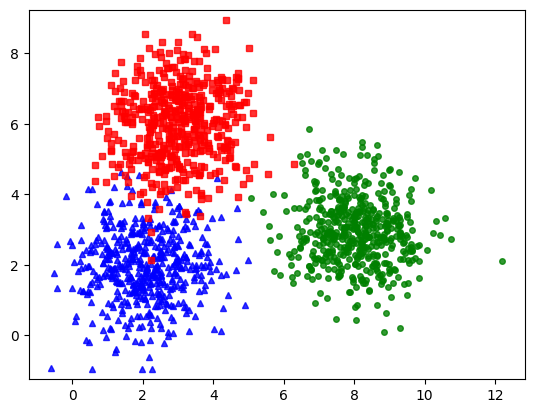

In [42]:
def kmeans_display(X, label, centers=None):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
    
    # Vẽ tâm cụm nếu chúng được cung cấp
    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, marker='x')
        
    plt.axis('equal')
    plt.plot()
    plt.show()
kmeans_display(X, original_label)

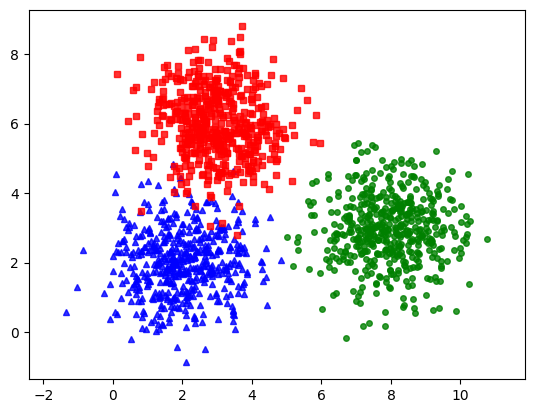

In [84]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

In [37]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [33]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by our algorithm:
[[2.98033628 6.03594875]
 [1.98854388 2.02706431]
 [7.94851678 2.95350208]]


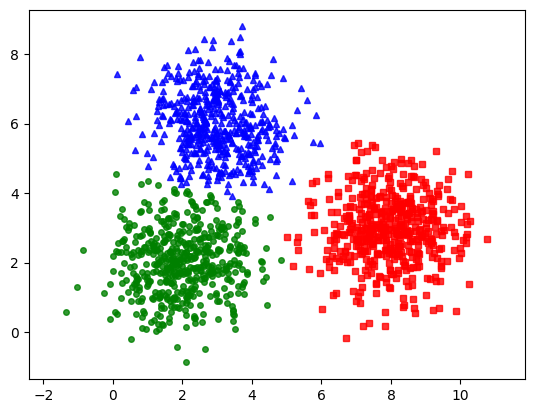

In [86]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

C:\Users\Duc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centers found by scikit-learn:
[[2.99357611 6.03605255]
 [8.0410628  3.02094748]
 [1.97634981 2.01123694]]


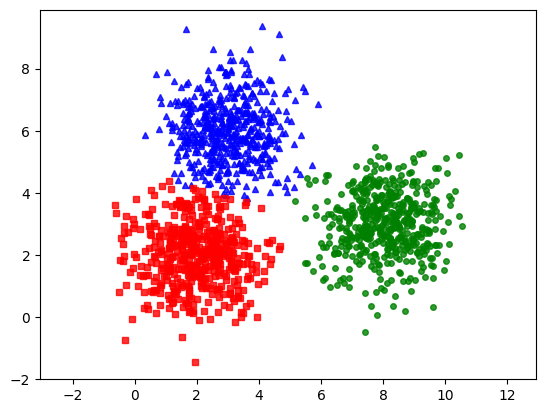

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)

Centers found by our algorithm:
[[-2.92175665 -0.39658147]
 [ 2.9087134   5.43002195]
 [ 5.89817805 -2.3864136 ]]


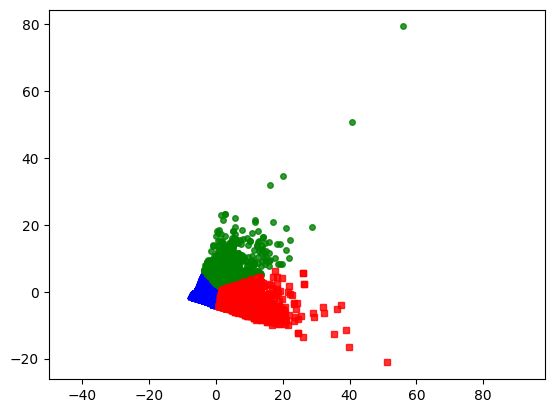

In [133]:
from sklearn.decomposition import PCA

# Khởi tạo PCA với số chiều cần giảm xuống là 2
pca = PCA(n_components=2)

# Fit và transform dữ liệu
X_pca = pca.fit_transform(X)

# Tiếp tục sử dụng k-means trên dữ liệu đã giảm chiều
(centers, labels, it) = kmeans(X_pca, K)
print('Centers found by our algorithm:')
print(centers[-1])

# Trực quan hóa kết quả
kmeans_display(X_pca, labels[-1])


Centers found by our algorithm:
[[12.53190755  2.45256985  3.43535012  2.27975164]
 [ 6.97291441  8.59750813  4.45755146  2.7248104 ]
 [ 3.72436316  1.66714566  1.87171261  1.20509471]]


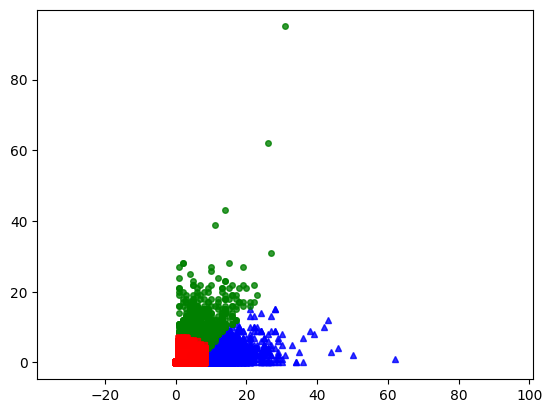

In [135]:
X = df[['Video', 'Reading', 'Time', 'Quiz']].values
K = 3

(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

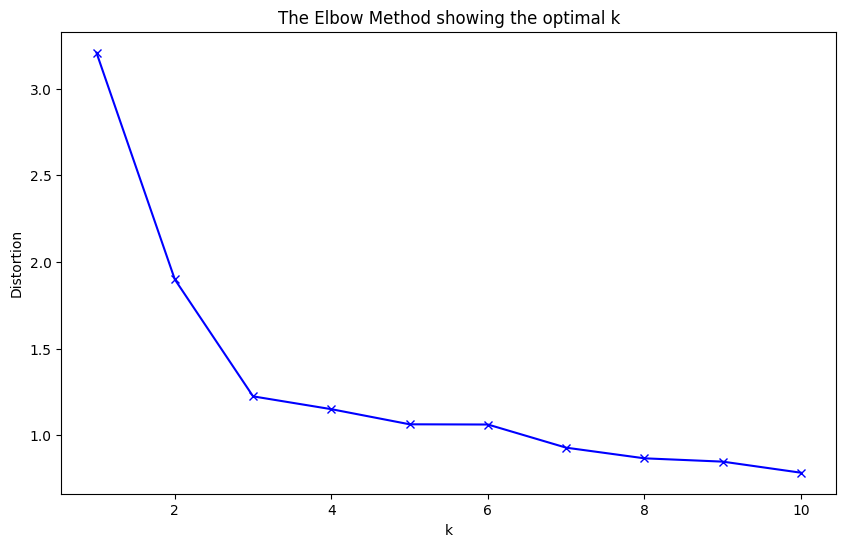

In [121]:
from scipy.spatial.distance import cdist

def elbow_method(X, K_range):
    distortions = []
    for k in K_range:
        (centers, labels, it) = kmeans(X, k)
        # Tính tổng bình phương khoảng cách từ mỗi điểm đến trung tâm cụm gần nhất
        distortions.append(sum(np.min(cdist(X, centers[-1], 'euclidean'), axis=1)) / X.shape[0])

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    plt.plot(K_range, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

# Giả sử bạn muốn kiểm tra từ 1 đến 10 cụm
K_range = range(1,11)
elbow_method(X, K_range)


In [ ]:
X = df[['Video', 'Reading', 'Time', 'Quiz']].values
K = 3

(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])